In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns
sns.set(style="darkgrid")

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

import folium


In [2]:
df = pd.read_csv('data/cleaned_311_test_2015.csv', header=0, sep=',', quotechar='"',parse_dates=['created_date', 'closed_date'],
     infer_datetime_format=True)
df.head(5)

,Unnamed: 0,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,city,community_board,borough,latitude,longitude,location
0,0,36335488,2017-06-01,2017-06-23,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,10474,BRONX,02 BRONX,BRONX,40.812797,-73.886981,"(40.81279663744078, -73.8869808964065)"
1,1,36334571,2017-06-01,2017-06-22,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,11215,BROOKLYN,06 BROOKLYN,BROOKLYN,40.668242,-73.989604,"(40.66824162997938, -73.98960394471317)"
2,2,36334446,2017-06-01,2017-06-21,DOHMH,Department of Health and Mental Hygiene,Unsanitary Pigeon Condition,Pigeon Waste,10303,STATEN ISLAND,01 STATEN ISLAND,STATEN ISLAND,40.626336,-74.174961,"(40.62633610844385, -74.17496135020113)"
3,3,36332405,2017-06-01,2017-06-22,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,11215,BROOKLYN,06 BROOKLYN,BROOKLYN,40.668242,-73.989604,"(40.66824162997938, -73.98960394471317)"
4,4,36332388,2017-06-01,2017-06-21,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,11105,Astoria,01 QUEENS,QUEENS,40.777379,-73.909192,"(40.777379055532506, -73.9091923175842)"


# What do people complain about in NY ?

In [3]:
complaint_count = df['complaint_type'].value_counts()

In [5]:
#Dropping unsignificant complaints
significant_indices = [True if complaint_count[x] > sum(complaint_count)/100 else False for x in df['complaint_type']]
df = df[significant_indices]
#df['complaint_type'].value_counts()

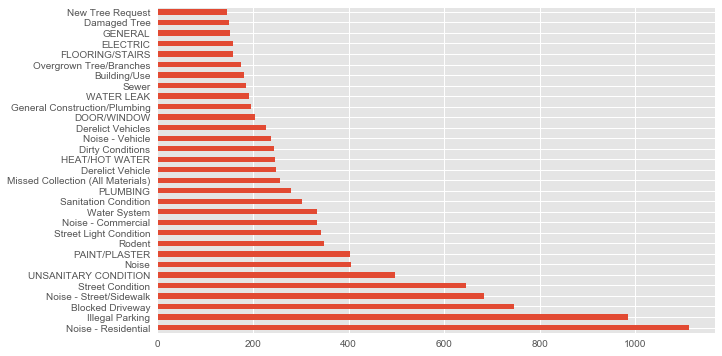

In [6]:
df['complaint_type'].value_counts().plot(kind='barh', figsize=(10,6))
#complaint_count = sns.countplot(y="complaint_type", data=df)

In [7]:
#Dropping unspecified boroughs
df.dropna(subset=['borough'],how='any')
#df.isnull().sum()

Unnamed: 0           0
unique_key           0
created_date         0
closed_date        740
agency               0
agency_name          0
complaint_type       0
descriptor           0
incident_zip         0
city                 0
community_board      0
borough              0
latitude             0
longitude            0
location             0
dtype: int64

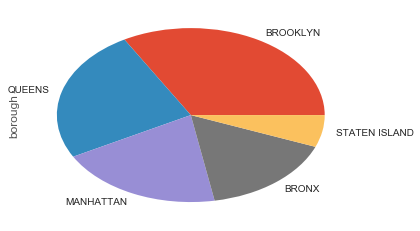

In [8]:
df['borough'].value_counts().plot(kind='pie')

# Time analysis

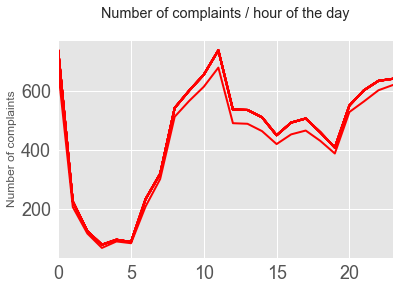

In [9]:
df['hour'] = df['created_date'].apply(lambda x: x.hour)
hour_counts = df.groupby(['hour'],sort = True).count()

# Plot trip counts
hour_counts.plot(kind = 'line', stacked = False,
                  color = 'red', linewidth = 2, legend = False)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.title('Number of complaints / hour of the day\n')
plt.xlabel('')
plt.ylabel('Number of complaints')